# Softmax回归
$$s_k(\mathbf x) = \mathbf x^\top\mathbf\theta^{(k)} \Rightarrow \hat p_k = \sigma(\mathbf s(\mathbf x))_k = \frac{\exp(s_k(\mathbf x))}{\sum_{j = 1}^K\exp(s_j(\mathbf x))} \Rightarrow\hat y = \argmax_k \sigma(\mathbf s(\mathbf x))_k = \argmax_k s_k(\mathbf x) = \argmax_k s_k((\mathbf\theta^{(k)})^\top\mathbf x)$$
- 交叉熵成本函数：$J(\mathbf\Theta) = -\frac1m\sum_{i = 1}^m\sum_{k = 1}^Ky_k^{(i)}\log(\hat p_k^{(i)}) \Rightarrow \nabla_{\mathbf\theta(k)} J(\mathbf\Theta) = \frac1m\sum_{i = 1}^m(\hat p_k^{(i)} - y_k^{(i)})\mathbf x^{(i)}$

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap


IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [10]:
softmax_reg.predict([[5, 2]])

array([2])

In [11]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

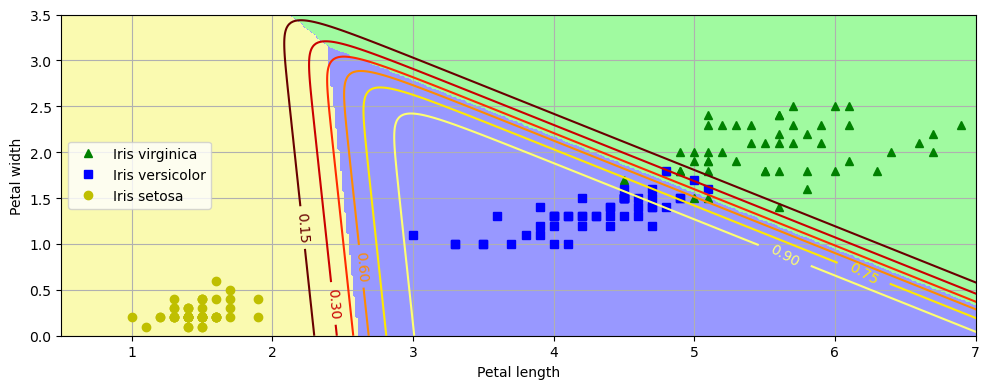

In [12]:
# extra code – this cell generates and saves Figure 4–25

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
save_fig("softmax_regression_contour_plot")
plt.show()

[返回](readme.md)